In [88]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [89]:
#Prediction Model 1 - Linear Regression off of house size
df = pd.read_csv('realtor_random_data_cleaned.csv')

In [90]:
df.head()

status    price  bed  bath  acre_lot     street  \
0  for_sale                          69900    4     2      0.13   821384.0   
1  for_sale                        1550000    3     3      0.15   945950.0   
2  for_sale                         259900    5     4      2.17   408723.0   
3  for_sale                         459800    4     3      0.36   253033.0   
4  for_sale                         256225    4     3      0.17  1291946.0   

        city                           state  zip_code  house_size   date_sold  
0    Buffalo  New York                           14213        1780  1993-12-29  
1  Whitefish  Montana                            59937        2562         NaN  
2     Wausau  Wisconsin                          54401        2364         NaN  
3  Lindstrom  Minnesota                          55045        2489  2015-03-27  
4    Hammond  Louisiana                          70401        1847         NaN

In [91]:
home_df=df[['status', 'price', 'bed', 'bath', 'acre_lot', 'house_size']]
home_df

status    price  bed  bath  acre_lot  \
0      for_sale                          69900    4     2      0.13   
1      for_sale                        1550000    3     3      0.15   
2      for_sale                         259900    5     4      2.17   
3      for_sale                         459800    4     3      0.36   
4      for_sale                         256225    4     3      0.17   
...                               ...      ...  ...   ...       ...   
52644  for_sale                         290000    3     2      0.25   
52645  for_sale                         220000    4     4      0.30   
52646  for_sale                         124500    2     2      0.14   
52647  for_sale                         175000   10     6      0.17   
52648  for_sale                         499999    3     3      1.12   

       house_size  
0            1780  
1            2562  
2            2364  
3            2489  
4            1847  
...           ...  
52644        1786  
52645        1638  
52646        1523  
52647        4472  
52648        2751  

[52649 rows x 6 columns]

In [92]:
home_df=home_df.dropna()
home_df

status    price  bed  bath  acre_lot  \
0      for_sale                          69900    4     2      0.13   
1      for_sale                        1550000    3     3      0.15   
2      for_sale                         259900    5     4      2.17   
3      for_sale                         459800    4     3      0.36   
4      for_sale                         256225    4     3      0.17   
...                               ...      ...  ...   ...       ...   
52644  for_sale                         290000    3     2      0.25   
52645  for_sale                         220000    4     4      0.30   
52646  for_sale                         124500    2     2      0.14   
52647  for_sale                         175000   10     6      0.17   
52648  for_sale                         499999    3     3      1.12   

       house_size  
0            1780  
1            2562  
2            2364  
3            2489  
4            1847  
...           ...  
52644        1786  
52645        1638  
52646        1523  
52647        4472  
52648        2751  

[52649 rows x 6 columns]

In [93]:
home_df = home_df[home_df['house_size'] <= 20000]
home_df = home_df[home_df['price'] <= 5000000]
home_df

status    price  bed  bath  acre_lot  \
0      for_sale                          69900    4     2      0.13   
1      for_sale                        1550000    3     3      0.15   
2      for_sale                         259900    5     4      2.17   
3      for_sale                         459800    4     3      0.36   
4      for_sale                         256225    4     3      0.17   
...                               ...      ...  ...   ...       ...   
52644  for_sale                         290000    3     2      0.25   
52645  for_sale                         220000    4     4      0.30   
52646  for_sale                         124500    2     2      0.14   
52647  for_sale                         175000   10     6      0.17   
52648  for_sale                         499999    3     3      1.12   

       house_size  
0            1780  
1            2562  
2            2364  
3            2489  
4            1847  
...           ...  
52644        1786  
52645        1638  
52646        1523  
52647        4472  
52648        2751  

[52369 rows x 6 columns]

In [94]:
# Create a scatter plot of price versus the house size information
sales_plot = home_df.hvplot.scatter(
    x="house_size",
    y="price",
    title="Sales price per House Size"
)
sales_plot

:Scatter   [house_size]   (price)

In [95]:
# Create the X set by using the `reshape` function to format the ads data as a single column array.
X = home_df["house_size"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[1780],
       [2562],
       [2364],
       [2489],
       [1847]])

In [96]:
# Create an array for the dependent variable y with the sales data
y = home_df["price"]

In [97]:
# Create a model with scikit-learn
model = LinearRegression()

In [98]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [99]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [238.06839948]


In [100]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: -53767.19024669356


In [101]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = -53767.19024669356 + 238.06839948400506X


In [102]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [103]:
# Create a copy of the original data
home_df_predicted = home_df.copy()

# Add a column with the predicted sales values
home_df_predicted["Predicted_sales_price"] = predicted_y_values

# Display sample data
home_df_predicted.head()

status    price  bed  bath  acre_lot  house_size  \
0  for_sale                          69900    4     2      0.13        1780   
1  for_sale                        1550000    3     3      0.15        2562   
2  for_sale                         259900    5     4      2.17        2364   
3  for_sale                         459800    4     3      0.36        2489   
4  for_sale                         256225    4     3      0.17        1847   

   Predicted_sales_price  
0          369994.560835  
1          556164.049231  
2          509026.506133  
3          538785.056069  
4          385945.143600

In [104]:
# Create a line plot of house size versus the predicted sales price
best_fit_line = home_df_predicted.hvplot.line(
    x = "house_size",
    y = "Predicted_sales_price",
    color = "red"
)
best_fit_line

:Curve   [house_size]   (Predicted_sales_price)

In [105]:
# Superpose the original data and the best fit line
sales_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [house_size]   (price)
   .Curve.I   :Curve   [house_size]   (Predicted_sales_price)

In [106]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.34702188538609635.
The r2 is 0.34702188538609635.
The mean squared error is 162175335662.563.
The root mean squared error is 402709.9895241773.
The standard deviation is 498359.89992432337.


In [107]:
#Prediction Model 2 - Random Forest using Bed, Bath, Acre size and House Size
df2 = pd.read_csv('realtor_random_data_cleaned.csv')

In [108]:
df2.head(100)

status    price  bed  bath  acre_lot     street  \
0   for_sale                          69900    4     2      0.13   821384.0   
1   for_sale                        1550000    3     3      0.15   945950.0   
2   for_sale                         259900    5     4      2.17   408723.0   
3   for_sale                         459800    4     3      0.36   253033.0   
4   for_sale                         256225    4     3      0.17  1291946.0   
..                             ...      ...  ...   ...       ...        ...   
95  for_sale                         115000    3     2      0.37  1375606.0   
96  for_sale                         750000    4     3      9.06   645491.0   
97  for_sale                         285000    3     2      0.79   535590.0   
98  for_sale                        1421692    4     4      1.00  1970635.0   
99  for_sale                         560000    3     4      6.00   195496.0   

             city                           state  zip_code  house_size  \
0         Buffalo  New York                           14213        1780   
1       Whitefish  Montana                            59937        2562   
2          Wausau  Wisconsin                          54401        2364   
3       Lindstrom  Minnesota                          55045        2489   
4         Hammond  Louisiana                          70401        1847   
..            ...                             ...       ...         ...   
95    Leitchfield  Kentucky                           42754        1488   
96  Mineral Bluff  Georgia                            30559        4032   
97         Morley  Michigan                           49336        1400   
98       Ham Lake  Minnesota                          55303        5024   
99       La Plata  Maryland                           20646        2112   

     date_sold  
0   1993-12-29  
1          NaN  
2          NaN  
3   2015-03-27  
4          NaN  
..         ...  
95  2013-08-17  
96  1997-02-12  
97         NaN  
98         NaN  
99  1981-11-05  

[100 rows x 11 columns]

In [109]:
df2['status'].value_counts()

status
for_sale                          52649
Name: count, dtype: int64

In [110]:
#Define features and target
X = df[['bed', 'bath', 'acre_lot', 'house_size']]
y = df['price']

In [111]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
#Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [113]:
#Predict on the test set
y_pred = model.predict(X_test)

In [114]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.1810


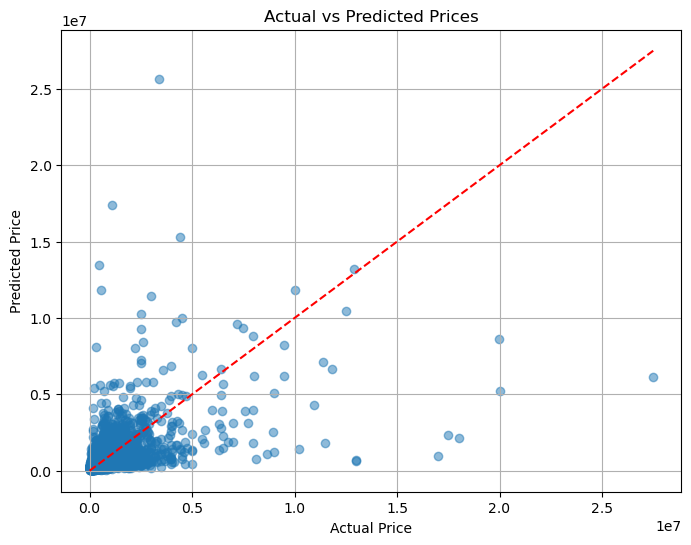

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

In [117]:
#Prediction Model 3 - Deep Learning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [118]:
# Import our input dataset
df3 = pd.read_csv('realtor_random_data_cleaned.csv')
df3.head(50)

status    price  bed  bath  acre_lot     street  \
0   for_sale                          69900    4     2      0.13   821384.0   
1   for_sale                        1550000    3     3      0.15   945950.0   
2   for_sale                         259900    5     4      2.17   408723.0   
3   for_sale                         459800    4     3      0.36   253033.0   
4   for_sale                         256225    4     3      0.17  1291946.0   
5   for_sale                        1849000    5     7      0.28    74891.0   
6   for_sale                         379445    4     3      0.24  1345111.0   
7   for_sale                        1150000    4     3      2.01  1416775.0   
8   for_sale                         389000    4     3      0.16   689714.0   
9   for_sale                        1280000   75    30      0.39  1165833.0   
10  for_sale                         379900    4     4      0.19   206657.0   
11  for_sale                         539900    2     1    104.50    66914.0   
12  for_sale                          19000    6     2      0.10    51401.0   
13  for_sale                         365900    4     2      0.17   874797.0   
14  for_sale                         419900    3     3      0.30   370558.0   
15  for_sale                         545500    3     2      0.47   388718.0   
16  for_sale                         625000    4     2      0.27  1495259.0   
17  for_sale                         537727    3     2      0.47   139310.0   
18  for_sale                         189000    4     2      0.18  1151098.0   
19  for_sale                          86000    3     2      0.16  1345720.0   
20  for_sale                         350000    3     3      0.04   635831.0   
21  for_sale                         120000    2     1      0.15  1221860.0   
22  for_sale                        1000095    4     3      0.23   378477.0   
23  for_sale                         400000    3     2      0.14  1407778.0   
24  for_sale                         845000    4     4      0.42  1193851.0   
25  for_sale                         317810    2     2      0.04   709408.0   
26  for_sale                         515000    4     4      1.00  1751698.0   
27  for_sale                          20000    6     2      0.25   752149.0   
28  for_sale                         765000    2     2      0.21    23981.0   
29  for_sale                         349900    4     4      1.15  1628693.0   
30  for_sale                         249900    3     3      0.14  1766473.0   
31  for_sale                         448000    4     2      0.01  1824124.0   
32  for_sale                         434900    3     2      0.02    70785.0   
33  for_sale                         899995    5     4      0.17   753350.0   
34  for_sale                         344485    2     2      0.13  1082640.0   
35  for_sale                         363000    3     2      0.33   276199.0   
36  for_sale                         603179    4     3      0.26  1624595.0   
37  for_sale                         509900    3     4      0.02  1806583.0   
38  for_sale                        1600000    6     5      1.55  1706481.0   
39  for_sale                         345900    5     3      0.20  1452454.0   
40  for_sale                          89435    3     1      0.27  1781784.0   
41  for_sale                         499900    4     4      0.89   838869.0   
42  for_sale                         365999    3     2      1.00    56974.0   
43  for_sale                         259900    3     2      0.29   932527.0   
44  for_sale                         368500    4     4      0.39   736165.0   
45  for_sale                         215000    2     2      0.02   667455.0   
46  for_sale                         115000    2     1      0.11  1258862.0   
47  for_sale                         385000    8     3      0.16  1010389.0   
48  for_sale                         329999    3     2      0.15    39535.0   
49  for_sale                         589900    3     2      1.00   295558.0   

In [119]:
# Select only numeric columns needed
df = df[['bed', 'bath', 'acre_lot', 'house_size', 'price']]

# Drop any rows with missing values in selected columns
df = df.dropna()

In [120]:
# Define features and target
X = df[['bed', 'bath', 'acre_lot', 'house_size']]
y = df['price']

In [121]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Normalize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Select only numeric columns needed
df = df[['bed', 'bath', 'acre_lot', 'house_size', 'price']]

# Drop any rows with missing values in selected columns
df = df.dropna()

In [123]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=64, activation="relu", input_dim=4))

nn_model.add(tf.keras.layers.Dense(units=32, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 2.1691e-04 - loss: -4804603820376064.0000
Epoch 2/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 2.5787e-04 - loss: -4991271152123904.0000
Epoch 3/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 2.9312e-04 - loss: -5211914359537664.0000
Epoch 4/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 2.6862e-04 - loss: -5108668714450944.0000
Epoch 5/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 2.9365e-04 - loss: -5424735357763584.0000
Epoch 6/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 4.2871e-04 - loss: -5201608048640000.0000
Epoch 7/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 3.3643e-04 - loss: -6055921604100096.0000
Epoch 8/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 3.3143e-04 - loss: -5847338127982592.0000
Epoch 9/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 3.4391e-04 - loss: -5669855046926336.0000
Epoch 10/5

In [139]:
# Import our input dataset
df = pd.read_csv('realtor_random_data_cleaned.csv')
df.head(10)

status    price  bed  bath  acre_lot     street  \
0  for_sale                          69900    4     2      0.13   821384.0   
1  for_sale                        1550000    3     3      0.15   945950.0   
2  for_sale                         259900    5     4      2.17   408723.0   
3  for_sale                         459800    4     3      0.36   253033.0   
4  for_sale                         256225    4     3      0.17  1291946.0   
5  for_sale                        1849000    5     7      0.28    74891.0   
6  for_sale                         379445    4     3      0.24  1345111.0   
7  for_sale                        1150000    4     3      2.01  1416775.0   
8  for_sale                         389000    4     3      0.16   689714.0   
9  for_sale                        1280000   75    30      0.39  1165833.0   

           city                           state  zip_code  house_size  \
0       Buffalo  New York                           14213        1780   
1     Whitefish  Montana                            59937        2562   
2        Wausau  Wisconsin                          54401        2364   
3     Lindstrom  Minnesota                          55045        2489   
4       Hammond  Louisiana                          70401        1847   
5    Naperville  Illinois                           60563        7582   
6      Sylvania  Ohio                               43560        2119   
7  Kenneth City  Florida                            33709        2656   
8     Bradenton  Florida                            34212        2222   
9      Endicott  New York                           13760       22752   

    date_sold  
0  1993-12-29  
1         NaN  
2         NaN  
3  2015-03-27  
4         NaN  
5  2015-07-09  
6         NaN  
7  2013-01-23  
8  2005-08-03  
9  2004-12-08

In [144]:
ohio_df = df[df['state'].str.contains('Ohio', na=False)]
ohio_df

status   price  bed  bath  acre_lot     street  \
6      for_sale                        379445    4     3      0.24  1345111.0   
12     for_sale                         19000    6     2      0.10    51401.0   
18     for_sale                        189000    4     2      0.18  1151098.0   
46     for_sale                        115000    2     1      0.11  1258862.0   
76     for_sale                        339900    4     3      0.93   691920.0   
...                               ...     ...  ...   ...       ...        ...   
52582  for_sale                        139900    3     1      0.15   394172.0   
52610  for_sale                        325000    2     3      0.07  1350270.0   
52625  for_sale                         39500    2     1      0.46  1604321.0   
52639  for_sale                        192500    3     2      0.06   734895.0   
52642  for_sale                        200000    4     2      0.24  1358107.0   

                   city                           state  zip_code  house_size  \
6              Sylvania  Ohio                               43560        2119   
12            Cleveland  Ohio                               44108        3112   
18         South Euclid  Ohio                               44121        1512   
46            Cleveland  Ohio                               44135        1008   
76     New Philadelphia  Ohio                               44663        2494   
...                 ...                             ...       ...         ...   
52582         Cleveland  Ohio                               44111         975   
52610        Cincinnati  Ohio                               45202        1354   
52625     Williamsfield  Ohio                               44093        1300   
52639        Wellington  Ohio                               44090        1454   
52642              Kent  Ohio                               44240        1670   

        date_sold  
6             NaN  
12     2020-03-20  
18     2001-10-05  
46     2014-10-31  
76     2016-08-30  
...           ...  
52582  2021-08-13  
52610  2006-09-07  
52625         NaN  
52639         NaN  
52642  2015-12-23  

[2327 rows x 11 columns]

In [145]:
ohio_df=df[['status', 'price', 'bed', 'bath', 'acre_lot', 'house_size']]
ohio_df.head()

status    price  bed  bath  acre_lot  house_size
0  for_sale                          69900    4     2      0.13        1780
1  for_sale                        1550000    3     3      0.15        2562
2  for_sale                         259900    5     4      2.17        2364
3  for_sale                         459800    4     3      0.36        2489
4  for_sale                         256225    4     3      0.17        1847

In [146]:
# Create a scatter plot of price versus the house size information
sales_plot = ohio_df.hvplot.scatter(
    x="house_size",
    y="price",
    title="Sales price per House Size"
)
sales_plot

:Scatter   [house_size]   (price)

In [147]:
# Create the X set by using the `reshape` function to format the ads data as a single column array.
X = ohio_df["house_size"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[1780],
       [2562],
       [2364],
       [2489],
       [1847]])

In [148]:
# Create an array for the dependent variable y with the sales data
y = ohio_df["price"]

In [149]:
# Create a model with scikit-learn
model = LinearRegression()

In [150]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [151]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [286.57628007]


In [152]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: -122507.35207564454


In [153]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = -122507.35207564454 + 286.5762800704374X


In [154]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [155]:
# Create a copy of the original data
ohio_df_predicted = ohio_df.copy()

# Add a column with the predicted sales values
ohio_df_predicted["Predicted_sales_price"] = predicted_y_values

# Display sample data
ohio_df_predicted.head()

status    price  bed  bath  acre_lot  house_size  \
0  for_sale                          69900    4     2      0.13        1780   
1  for_sale                        1550000    3     3      0.15        2562   
2  for_sale                         259900    5     4      2.17        2364   
3  for_sale                         459800    4     3      0.36        2489   
4  for_sale                         256225    4     3      0.17        1847   

   Predicted_sales_price  
0          387598.426450  
1          611701.077465  
2          554958.974011  
3          590781.009020  
4          406799.037214

In [156]:
# Create a line plot of house size versus the predicted sales price
best_fit_line = ohio_df_predicted.hvplot.line(
    x = "house_size",
    y = "Predicted_sales_price",
    color = "red"
)
best_fit_line

:Curve   [house_size]   (Predicted_sales_price)

In [157]:
# Superpose the original data and the best fit line
sales_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [house_size]   (price)
   .Curve.I   :Curve   [house_size]   (Predicted_sales_price)

In [158]:
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.20731395855286439.
The r2 is 0.20731395855286439.
The mean squared error is 788535197591.5148.
The root mean squared error is 887995.0436750842.
The standard deviation is 997378.3491751426.
